# ICAT3190, Module 5, Supervised machine learning

## Machine learning

![featureextraction_p.svg](kuvat/featureextraction_p.svg)

 * The purpose of the supervised machine learning is the teach an algorithm to repeat the work done by a reference method
 * This is usefull if the reference method is more expensive, slower or it has other problems
 * Often the reference method is a human observer, and it can be replaced with an algorithm

## The target of supervised machine learning
Task is to find a function $f$, which predicts variable $y_i$ based on $p$ features $x_{i,j}$, where $i \in [0,N]$ and $j \in [0,P]$.

$$
   \begin{bmatrix}
   y_1 \\
   y_2 \\
   \vdots \\
   y_n
   \end{bmatrix}
   = f 
   \left( \begin{bmatrix}
     x_{11} & x_{12} & x_{13} & \dots  & x_{1p} \\
     x_{21} & x_{22} & x_{23} & \dots  & x_{2p} \\
     \vdots & \vdots & \vdots & \ddots & \vdots \\
     x_{n1} & x_{n2} & x_{n3} & \dots  & x_{np}
   \end{bmatrix} \right)
$$



# Supervised machine learning methods for decision making (Classification)



# Classification


In [46]:
# Import standard stuff, plus material from Scikit Learn

import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# Read the IRIS data set for later use
#import seaborn as sns   
#sns.set(style='ticks')  
#iris = sns.load_dataset('iris')   


# Distance

 - Clustering, classification and regression assume that samples near each other, at close proximity, are more similar with each other than those which are farther away. 

But what do we mean by distance?

There are many distance metrics:
 - Euclidean distance $r_{1,2}=\sqrt{(x_1 -x_2)^2 + (y_1 - y_2)^2 + (z_1 -z_2)^2}$
 - Manhattan distance $r_{1,2}=|x_1-x_2| + |y_1-y_2| + |z_1-z_2|$
 - [Mahalanobis distance](https://www.statisticshowto.datasciencecentral.com/mahalanobis-distance/) 
   $r_{1,2}== \sqrt{(p_1 – p_2)^T \; C^{-1} \; (p_1 – p_2)}$, where $C$ is the covariance matrix.
   

Text(0,0.5,'Feature 2')

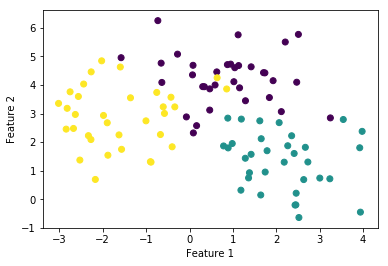

In [47]:
# Create a synthetic data set and plot it
X,y=datasets.make_blobs(n_samples=100, centers=3, n_features=2, random_state=0)
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

## What if the scaling is different?

Text(0,0.5,'Feature 2')

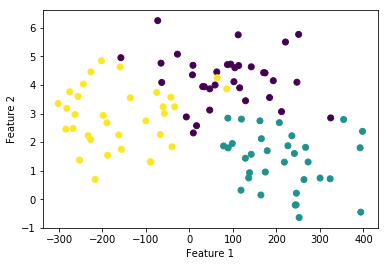

In [4]:
# Create a synthetic data set and plot it
X,y=datasets.make_blobs(n_samples=100, centers=3, n_features=2, random_state=0)
X2= X*[100,1]
y2=y
plt.scatter(X2[:,0], X2[:,1], c=y2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

The problem is that the distances are dominated by feature1 and feature 2 is not significant, even though intuitively it seems to be very important for classification.

## Then scale it first
To elimninate the distortion due to scaling, normalise the varibles first. Usullay they are normalized so that the means and standard deviations are are the same. Usually $\bar{x}=0$¸ and $\sigma_x =1$.

 $$x=\frac{x-\bar{x}}{\sigma_x}$$,
 where $\bar{x}$ is the mean value of x.
 
 Scikit Learn includes StandardScaler() object for standardisation of features:
 


Text(0,0.5,'Feature 2')

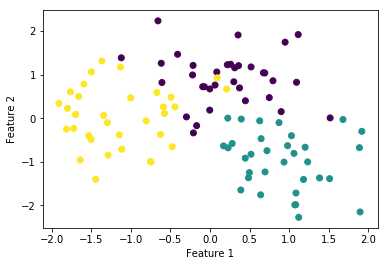

In [5]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X2)
X2s=scaler.transform(X2)
plt.scatter(X2s[:,0], X2s[:,1], c=y2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

Now both features have equal weights.

But beware outliers when scaling features. Only one outlier can spoil your scaling! There are also robust scalers.

# Nearest Neighbours methods

Nearest Neighbour methods provide some very staightforward methods for supervised machine learning

## Brute force implementation

 1. Set the number of nearest neighbours, $K$
 1. To predict one new sample, calculate its distance to all known training samples
 1. Order the list of distances
 1. Select $K$ nearest samples and use them for prediction
    - In case of classification, the result is the mode of the K-nearest set
    - In case of regression, the result is for example the average of the K-nearest set


- The asymptotic execution time of the brute for implementation is $\mathcal{O}[D N^2]$ which makes it unsuitable for large data sets and high dimesional problems
- To extend NN method, the neighbourhood information can be encoded in a tree structure to reduce the number of distances which need to be calculated. For example a KD-Tree implementation can be calculated in $\mathcal{O}[D N \log ({N})]$ time.
- The Ball-Tree implementation makes algorith even more suitable in high-dimensional problems 

In [6]:
from sklearn import neighbors
n_neighbors = 5
knn=neighbors.KNeighborsClassifier(n_neighbors)
knn.fit(X,y)
knn.predict(X)


array([1, 0, 1, 0, 0, 0, 2, 2, 1, 0, 0, 0, 1, 0, 2, 1, 2, 0, 2, 2, 2, 2, 2,
       0, 1, 1, 1, 1, 2, 2, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 2, 1, 1, 0, 0, 0,
       1, 1, 2, 2, 0, 1, 0, 1, 2, 2, 1, 1, 0, 1, 1, 2, 2, 2, 2, 1, 0, 2, 1,
       0, 2, 1, 2, 1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       2, 2, 2, 2, 0, 0, 2, 2])

In [11]:
import sklearn.metrics as metrics
print(metrics.confusion_matrix(y_true=y, y_pred=knn.predict(X), labels=None, sample_weight=None))
print("The accuracy of KNN in the original data is..... %4.2f" % metrics.accuracy_score(y_true=y, y_pred=knn.predict(X)))


knn2=neighbors.KNeighborsClassifier(n_neighbors)
knn2.fit(X2s,y)
print("The accuracy of KNN in the scaled data is....... %4.2f" %metrics.accuracy_score(y_true=y, y_pred=knn2.predict(X2s)))


knn3=neighbors.KNeighborsClassifier(n_neighbors)
knn3.fit(X2,y)
print("The accuracy of KNN for badly scaled data is.... %4.2f" %metrics.accuracy_score(y_true=y, y_pred=knn3.predict(X2)))

[[31  2  1]
 [ 0 33  0]
 [ 2  0 31]]
The accuracy of KNN in the original data is..... 0.95
The accuracy of KNN in the scaled data is....... 0.96
The accuracy of KNN for badly scaled data is.... 0.75


### Pipelining 
In Scikit Learn, all methods are build using the same interface. This makes it easier to build larger machine learning systems by combining different stages together as pipelines. 

For example, the scaling of features, dimensionality reduction, and sclassification can be combined as a single pipeline. This is especially usefull, when several datasets (validation data, testing data, production data, etc) needs to be fed through the same stages.

In [29]:
from sklearn.pipeline import Pipeline
n_neighbors=9
pipeline=Pipeline([
        ('Scaling', StandardScaler()),
        ('KNN', neighbors.KNeighborsClassifier(n_neighbors))
    ])
pipeline.fit(X2,y)
predictedY=pipeline.predict(X2)

print(metrics.confusion_matrix(y_true=y, y_pred=predictedY))
print(metrics.accuracy_score(y_true=y, y_pred=predictedY))


[[29  3  2]
 [ 1 32  0]
 [ 2  0 31]]
0.92


## Visualization of the decision boundaries

In [131]:
from matplotlib.colors import ListedColormap
def plotDB(pipe, X, y, steps=100):
    """Plots the Decision Boundary
        pipe = classification pipeline
        X is the training data used for training the classifier
        steps = number of x and y steps in calculating the boundary
    """
    # Create color map
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    hx = (x_max - x_min)/steps
    hy = (y_max - y_min)/steps
    xx, yy = np.meshgrid(np.arange(x_min, x_max, hx),
                         np.arange(y_min, y_max, hy))
    Z = pipe.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Decision boundary")


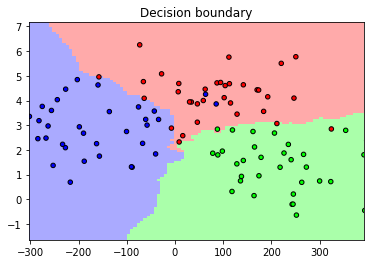

In [132]:
plotDB(pipeline, X2, y2)

### Variations
 - Nearest Centroid classifier
   - The training data is replaced with a centroid of each class
 - Neigborhood Component Analysis (NCA)
   - The coordinate axis are changed so that the separation between the classes is maximized
   - This supervised dimensionality reduction method can be used for exploring the data
   - It can also improve the performance of NN classifiers or regressors

## Nearest Centroid Classifier
Nearest centroid classifier does not need to store all training data, thats why it is also faster to predict.

0.91


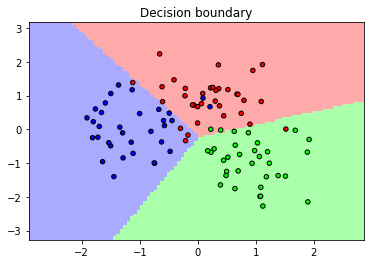

In [133]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
pipelineCentroid=Pipeline([
        ('Scaling', StandardScaler()),
        ('KNN', NearestCentroid())
    ])
pipelineCentroid.fit(X2s,y2)
predictedY=pipelineCentroid.predict(X2s)
print(metrics.accuracy_score(y_true=y2, y_pred=predictedY))
plotDB(pipelineCentroid, X2s, y2)

# Support Vector Machine (SVM)
 - SVM is kind of Jack of All Trades for classifiers
 - It does not save all training samples like NearestNeigbour method, but only the samples near the border of class boundaries.
 - These boundary samples are called as support vectors.
 - SVM works for high dimensional data and large sample sizes
 - Can be used for both classification and regression
 - Can be extended to nonlinear decision boundaries using kernels

## Decision boundary
 - SVM uses samples near the different clusters to define a decision boundary
 - The boundary which maximises the marginal of the boundary will be selected
 - THe support vectors definind the boundary will be stored

In [259]:
from sklearn.model_selection import train_test_split

# Lets create a two-dimensional dataset containing two cluster centers
X,y=datasets.make_blobs(n_samples=200, centers=2, n_features=2, random_state=0, cluster_std=0.6)

# Now the dataset will be splitted randomly to training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

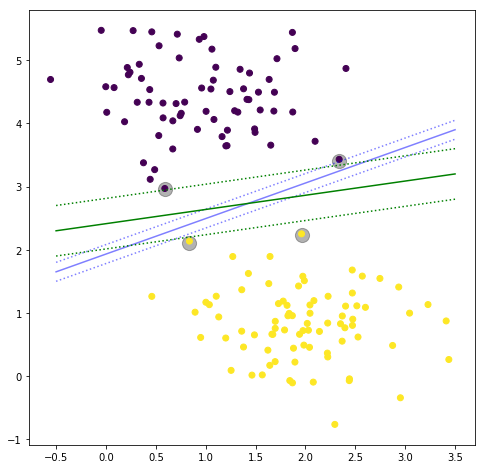

In [260]:
# Lets plot the data and optimal decision boundary with support vectors
a=plt.figure(figsize=(8,8))

plt.scatter([0.5965, 2.33479, 0.83645, 1.97], [2.9567, 3.4118, 2.11336, 2.23518],  s=200, c='k', alpha=0.3)

plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
ax=plt.gca()

# Plot decision boundaries
m=0.15; plt.plot([-0.5,3.5], [1.65,   3.9], 'b', alpha=0.5); plt.plot([-0.5,3.5], [1.65+m, 3.9+m], 'b:', alpha=0.5); plt.plot([-0.5,3.5], [1.65-m, 3.9-m], 'b:', alpha=0.5)
m=0.4; plt.plot([-0.5,3.5], [2.3, 3.2], 'g'); plt.plot([-0.5,3.5], [2.3+m, 3.2+m], 'g:'); plt.plot([-0.5,3.5], [2.3-m, 3.2-m], 'g:')

Accurary in the trainint set..1.000000
Accurary in the test set......1.000000
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


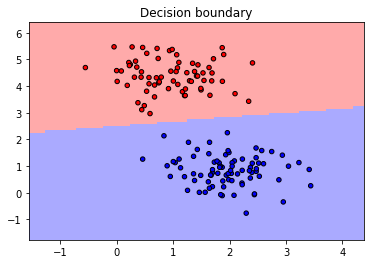

In [261]:
# Lets now try how actual linear SCV would work
from sklearn import svm
linsvc = svm.SVC(kernel='linear')
linsvc.fit(X_train, y_train)
plotDB(linsvc, X_train, y_train)

print("Accurary in the trainint set..%f" % metrics.accuracy_score(y_true=y_train, y_pred=linsvc.predict(X_train)))
print("Accurary in the test set......%f" % metrics.accuracy_score(y_true=y_test, y_pred=linsvc.predict(X_test)))
print(linsvc)

In [262]:
# Lets try slightly more complex case

# Lets create a two-dimensional dataset containing three cluster centers
X,y=datasets.make_blobs(n_samples=200, centers=3, n_features=2, random_state=0, cluster_std=1.1)

# Now the dataset will be splitted randomly to training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

Accurary in the trainint set..0.940000
Accurary in the test set......0.960000
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


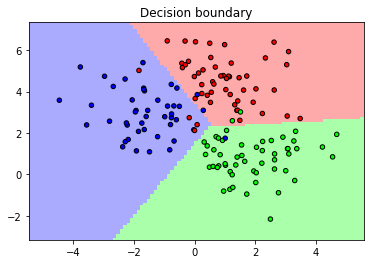

In [263]:
# Lets now try how actual linear SCV would work
from sklearn import svm
linsvc = svm.SVC(kernel='linear')
linsvc.fit(X_train, y_train)
plotDB(linsvc, X_train, y_train)

print("Accurary in the trainint set..%f" % metrics.accuracy_score(y_true=y_train, y_pred=linsvc.predict(X_train)))
print("Accurary in the test set......%f" % metrics.accuracy_score(y_true=y_test, y_pred=linsvc.predict(X_test)))
print(linsvc)

Accurary in the trainint set..0.933333
Accurary in the test set......0.960000
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)


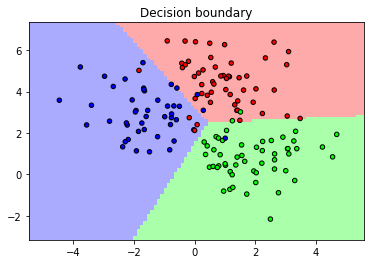

In [264]:
# Lets now try how actual linear SCV would work
Linsvc = svm.LinearSVC()
Linsvc.fit(X_train, y_train)
plotDB(Linsvc, X_train, y_train)

print("Accurary in the trainint set..%f" % metrics.accuracy_score(y_true=y_train, y_pred=Linsvc.predict(X_train)))
print("Accurary in the test set......%f" % metrics.accuracy_score(y_true=y_test, y_pred=Linsvc.predict(X_test)))
print(Linsvc)

## Kernel SVM

Linear kernel 

Accurary in the training set..0.946667
Accurary in the test set......0.940000
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


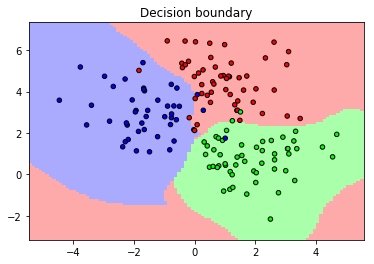

In [279]:
# Lets now try how actual linear SCV would work
rbfsvc = svm.SVC(kernel='rbf', gamma=1)  # gamma > 2 means overfitting
rbfsvc.fit(X_train, y_train)
plotDB(rbfsvc, X_train, y_train)

print("Accurary in the training set..%f" % metrics.accuracy_score(y_true=y_train, y_pred=rbfsvc.predict(X_train)))
print("Accurary in the test set......%f" % metrics.accuracy_score(y_true=y_test, y_pred=rbfsvc.predict(X_test)))
print(rbfsvc)

# Training, validation, testing and Cross Validation

![crossvalidation.svg](kuvat/crossvalidation.png "Crossvalidation")

 - Cross validation is an important technique to utilize the data more efficiently for all supervised training purposes
 - With cross validation, the training set is divided in N-folds.
 - At first (N-1) folds are used for training and 1 fold for validation
 - The process is repeated N times, until every sample has participated in training and validation sets
 - The final score is the average of all N scores

Mean CV score is 0.83, all scores= [ 0.83870968  0.90322581  0.73333333  0.82758621  0.86206897]
Best gamma value is 0.265897
Accurary in the test set......0.980000


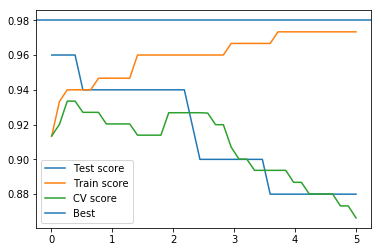

In [268]:
# Lets test the model with CV
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rbfsvc, X_train, y_train, cv=5)
print("Mean CV score is %4.2f, all scores=" % (scores.mean()), scores)

# CV can be put into loop to find optimal gamma value
gamma=np.linspace(0.01,5,40)
test_score=np.zeros(len(gamma))
train_score=np.zeros(len(gamma))
cv_score=np.zeros(len(gamma))
for i in range(len(gamma)):
    rbfsvc = svm.SVC(kernel='rbf', gamma=gamma[i])
    rbfsvc.fit(X_train, y_train)
    train_score[i]=metrics.accuracy_score(y_train, rbfsvc.predict(X_train))
    test_score[i]=metrics.accuracy_score(y_test, rbfsvc.predict(X_test))
    scores = cross_val_score(rbfsvc, X_train, y_train, cv=5)
    cv_score[i]=scores.mean()
plt.plot(gamma, test_score, label="Test score")
plt.plot(gamma, train_score, label="Train score")
plt.plot(gamma, cv_score, label="CV score")
best_gamma=gamma[cv_score.argmax()]
print("Best gamma value is %f" % best_gamma)
rbfsvcbest = svm.SVC(kernel='rbf', gamma=best_gamma).fit(X_test, y_test)
plt.axhline(metrics.accuracy_score(y_test, rbfsvcbest.predict(X_test)), label="Best")
plt.legend()
print("Accurary in the test set......%f" % metrics.accuracy_score(y_true=y_test, y_pred=rbfsvcbest.predict(X_test)))

# Non-linear classes
 - If the data described by $p_i=[x_i, y_i]^T$ is not linearly separable, it can be made linearly separable by adding a new term, for example $z_i=x_i^2 + y_i^2$
 - In this case, third dimension is introduced, and the linear classifier can work in the new three dimensional space $ p_i'=[x_i, y_i, z_i]^T $ 
 - SVM uses this kernel trick to separate non-linear cases
 - The kernel functions include the dot product of two points in a suitable feature space. Thus defining a notion of similarity, with little computational cost even in very high-dimensional spaces.
 - There are many kernel options, most common being
   - Polynomial kernel $k(p_i, p_j) = (p_i \cdot p_j +1)^d$
   - Gaussian  kernel or Gaussian Radial Basis Function (RBF), shown below
   
   $$k(p_i, p_j) = \exp \left( - \frac{\Vert p_i-p_j \Vert^2}{2 \sigma^2} \right)
   \qquad 
   k(p_i, p_j) = \exp ( - \gamma \Vert p_i-p_j \Vert^2) $$

Accurary in the training set..1.000000
Accurary in the test set......1.000000
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


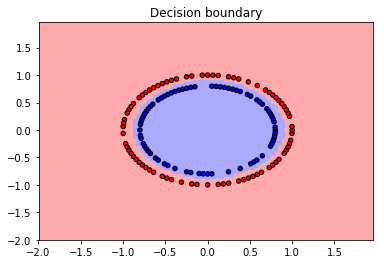

In [280]:
Xc,yc=datasets.make_circles(n_samples=200)
X_train, X_test, y_train, y_test = train_test_split(Xc,yc, test_size=0.25)

rbfsvc = svm.SVC(kernel='rbf', gamma='scale')
rbfsvc.fit(X_train, y_train)

print("Accurary in the training set..%f" % metrics.accuracy_score(y_true=y_train, y_pred=rbfsvc.predict(X_train)))
print("Accurary in the test set......%f" % metrics.accuracy_score(y_true=y_test, y_pred=rbfsvc.predict(X_test)))
print(rbfsvc)
plotDB(rbfsvc, X_train, y_train)

Accurary in the training set..0.520000
Accurary in the test set......0.440000
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.2, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


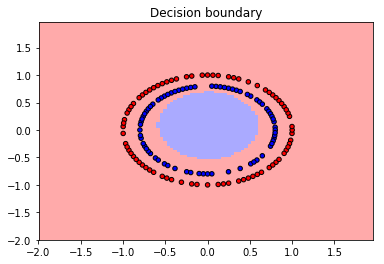

In [282]:
rbfsvc = svm.SVC(kernel='rbf', gamma=0.2)
rbfsvc.fit(X_train, y_train)

print("Accurary in the training set..%f" % metrics.accuracy_score(y_true=y_train, y_pred=rbfsvc.predict(X_train)))
print("Accurary in the test set......%f" % metrics.accuracy_score(y_true=y_test, y_pred=rbfsvc.predict(X_test)))
print(rbfsvc)
plotDB(rbfsvc, X_train, y_train)

Read more from [Understanding SVM](https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/)

## Summary
 - SVM is good for high dimensional cases
 - LinearSVC can include a regularization term L2, or L1
 - KernelSVM can form non-linear decision boundaries
 
Cons
  - SVM does not work so well for really big data sizes
  - It has also problems if there is plenty of noise in the data, so that classes are overlapping
  - 